In [1]:
import numpy as np
import pandas as pd

In [2]:
import sys

In [4]:
from common import compute_rmse_fraction, compute_rmse

In [5]:
import pickle

In [7]:
knn_p= pickle.load(open("predictions/knn_all_homes.pkl","r"))
tensor_custom_p = pickle.load(open("predictions/o_tf.pkl",'r'))['tf']
tensor_custom_static_weather_p = pickle.load(open("predictions/o_tf_energy_static.pkl",'r'))['tf_energy_static']
mf_p = pickle.load(open("predictions/o_mf.pkl",'r'))['mf']

In [8]:
knn= {}
feature='energy_static'
for appliance in knn_p.keys()[:]:
    knn[appliance] = {}
    for feature in ['energy', 'energy_static']:
        print appliance, feature
        best_error = 1e6
        for n in range(1, 10):
            pred = pd.DataFrame(knn_p[appliance][feature][n]).T

            error = compute_rmse(appliance,pred)
            if error < best_error:
                best_error = error
                knn[appliance][feature] = best_error

hvac energy
hvac energy_static
wm energy
wm energy_static
fridge energy
fridge energy_static
mw energy
mw energy_static
oven energy
oven energy_static
dw energy
dw energy_static


In [9]:
pd.DataFrame(knn)

,dw,fridge,hvac,mw,oven,wm
energy,9.085288,28.169410,257.444407,14.816635,11.292428,2.942066
energy_static,9.020700,26.046797,239.610921,14.278028,10.982420,3.166326


In [10]:
dataset = 'False'
tf_custom= {}
for cost in ['abs','rel']:
    tf_custom[cost]= {}

    for appliance in tensor_custom_p.keys()[:]:
        tf_custom[cost][appliance]= {}
        for case in [str(x) for x in range(1, 5)]:
            print cost, appliance, case
            best_error = 1e6
            for a in [str(x) for x in range(1, 10)]:
                error = compute_rmse(appliance,tensor_custom_p[appliance][case][a][cost][dataset])
                if error < best_error:
                    best_error = error
                    tf_custom[cost][appliance][case] = best_error

abs hvac 1
abs hvac 2
abs hvac 3
abs hvac 4
abs wm 1
abs wm 2
abs wm 3
abs wm 4
abs fridge 1
abs fridge 2
abs fridge 3
abs fridge 4
abs mw 1
abs mw 2
abs mw 3
abs mw 4
abs oven 1
abs oven 2
abs oven 3
abs oven 4
abs dw 1
abs dw 2
abs dw 3
abs dw 4
rel hvac 1
rel hvac 2
rel hvac 3
rel hvac 4
rel wm 1
rel wm 2
rel wm 3
rel wm 4
rel fridge 1
rel fridge 2
rel fridge 3
rel fridge 4
rel mw 1
rel mw 2
rel mw 3
rel mw 4
rel oven 1
rel oven 2
rel oven 3
rel oven 4
rel dw 1
rel dw 2
rel dw 3
rel dw 4


In [11]:
tensor_custom_p[appliance][case][a][cost][dataset]
appliance

'dw'

In [12]:
pd.DataFrame(tf_custom['abs'])

,dw,fridge,hvac,mw,oven,wm
1,8.453202,28.009425,257.351958,14.236279,10.675456,2.615287
2,9.689824,31.166695,265.101357,15.257285,15.009786,3.327571
3,9.414954,27.989203,246.201410,14.628756,12.805119,2.852567
4,8.829764,27.884970,253.887856,14.230339,11.257752,2.788957


In [13]:
tensor_custom_static_weather_p['hvac']['True']['1']['static']['weather'].keys()

['abs', 'rel']

In [14]:
dataset = 'False'
tf_custom_static_weather= {}
for cost in ['abs']:
    tf_custom_static_weather[cost]= {}

    for appliance in tensor_custom_static_weather_p.keys()[:]:
        tf_custom_static_weather[cost][appliance]= {}
        for static in ['None','static']:
            tf_custom_static_weather[cost][appliance][static] = {}
            for weather in ['None','weather']:
                tf_custom_static_weather[cost][appliance][static][weather] = {}
                print cost, appliance, static, weather
                best_error = 1e6
                for a in [str(x) for x in range(1, 10)]:
                    error = compute_rmse(appliance,tensor_custom_static_weather_p[appliance][dataset][a][static][weather][cost])
                    if error < best_error:
                        best_error = error
                        tf_custom_static_weather[cost][appliance][static][weather] = best_error

abs hvac None None
abs hvac None weather
abs hvac static None
abs hvac static weather
abs wm None None
abs wm None weather
abs wm static None
abs wm static weather
abs fridge None None
abs fridge None weather
abs fridge static None
abs fridge static weather
abs mw None None
abs mw None weather
abs mw static None
abs mw static weather
abs oven None None
abs oven None weather
abs oven static None
abs oven static weather
abs dw None None
abs dw None weather
abs dw static None
abs dw static weather


In [15]:
pd.DataFrame(tf_custom_static_weather[cost]['oven'])

,None,static
None,12.887628,13.571748
weather,13.013657,12.195881


In [35]:
out = {}
for static in ['None','static']:
    for weather in ['None','weather']:
        out[(static, weather)] =  {}
        for lat in range(1, 10):
            out[(static, weather)][lat] =  compute_rmse('hvac',tensor_custom_static_weather_p['hvac']['False'][str(lat)][static][weather]['abs'])

In [36]:
%matplotlib inline

In [37]:
pd.DataFrame(out)

None            static         
      None  weather     None  weather
1  305.594  291.835  241.031  234.522
2  273.186  276.823  232.863  232.365
3  263.771  255.827  227.773  230.248
4  273.484  281.630  225.637  223.914
5  262.479  256.815  228.190  227.601
6  295.341  315.101  239.866  252.402
7  316.765  413.899  250.668  335.078
8  372.292  516.373  349.952  463.770
9  424.549  570.511  430.566  639.469

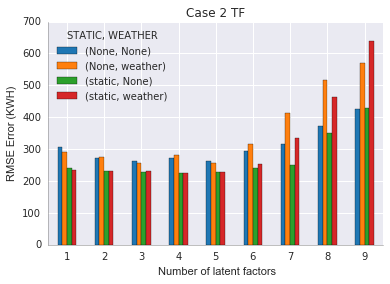

In [47]:
from plot_functions import *
pd.DataFrame(out).plot(kind="bar", rot=0,colors=tableau20blind[::2])
plt.title("Case 2 TF")
format_axes(plt.gca())
plt.ylabel("RMSE Error (KWH)")
plt.xlabel(" Number of latent factors")
plt.legend(title='STATIC, WEATHER',loc=0)

#### MF

In [20]:
mf_p['hvac']['energy_static']['absolute']['False']['3'].describe()

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,151.184976,345.530000,433.333082,524.310078,332.735815,192.858926
std,113.661809,241.056845,303.083870,364.626460,224.559462,132.385177
min,16.911303,33.528108,42.338257,50.577563,30.114986,18.093680
25%,62.779184,145.463489,182.176522,221.243475,144.966342,82.209650
50%,134.691044,313.335490,392.308570,476.275064,304.264688,176.273169
75%,202.642825,460.890106,579.060236,698.352903,444.921749,257.012689
max,1170.544331,2491.783200,3138.655625,3785.721303,2308.522766,1355.038146


In [21]:
tensor_custom_p['hvac']['2']['3']['abs']["False"].describe()

,0,1,2,3,4,5
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,189.065365,364.374496,448.856152,534.596470,350.741402,223.411303
std,73.695975,122.802827,152.165955,181.214432,117.586819,81.396773
min,41.532682,72.884904,87.650534,106.792543,77.674203,44.027325
25%,136.159734,267.977065,324.287141,385.135806,257.572001,163.348618
50%,183.607033,360.548182,451.969737,536.431387,352.269530,221.495634
75%,235.948630,452.220347,551.038630,664.591025,438.911640,278.050536
max,449.898920,648.556602,907.330889,1012.450665,694.191200,500.709086


In [22]:
mf_results = {}
dataset = 'False'
for appliance in mf_p:
    mf_results[appliance] = {}
    for feature in ['energy_static','energy']:
        mf_results[appliance][feature] = {}
        for cost in ['absolute']:
            mf_results[appliance][feature][cost] = {}
            least_error = 1000
            for lat in [str(x) for x in range(1, 10)]:
                try:
                    print lat, cost, feature, appliance
                    pred = mf_p[appliance][feature][cost][dataset][lat]
                    rms = compute_rmse(appliance, pred)
                    if rms < least_error:
                        least_error = rms
                        best_k = lat
                        print best_k, least_error
                except:
                    pass
            mf_results[appliance][feature][cost] = least_error

1 absolute energy_static hvac
2 absolute energy_static hvac
3 absolute energy_static hvac
3 235.477314501
4 absolute energy_static hvac
4 182.874432492
5 absolute energy_static hvac
5 178.611220716
6 absolute energy_static hvac
7 absolute energy_static hvac
8 absolute energy_static hvac
9 absolute energy_static hvac
1 absolute energy hvac
1 169.70787091
2 absolute energy hvac
3 absolute energy hvac
4 absolute energy hvac
5 absolute energy hvac
6 absolute energy hvac
6 157.045083362
7 absolute energy hvac
8 absolute energy hvac
9 absolute energy hvac
1 absolute energy_static wm
2 absolute energy_static wm
3 absolute energy_static wm
3 2.79438240952
4 absolute energy_static wm
4 2.70753674173
5 absolute energy_static wm
6 absolute energy_static wm
7 absolute energy_static wm
8 absolute energy_static wm
9 absolute energy_static wm
1 absolute energy wm
1 2.94747458707
2 absolute energy wm
3 absolute energy wm
4 absolute energy wm
5 absolute energy wm
6 absolute energy wm
7 absolute energy 

In [23]:
mf_relative = {}
mf_abs = {}
for appliance in mf_results.keys():
    for cost in ['absolute']:
        if cost=="absolute":
            mf_abs[appliance] =  pd.DataFrame(mf_results[appliance]).ix[cost]
        else:
            mf_relative[appliance] =  pd.DataFrame(mf_results[appliance]).ix[cost]


In [25]:
pd.DataFrame(mf_relative)

""


In [26]:
pd.DataFrame(mf_abs)

,dw,fridge,hvac,mw,oven,wm
energy,8.434697,31.014665,157.045083,15.009412,11.579156,2.947475
energy_static,7.180152,28.249017,178.611221,14.732223,12.026075,2.707537


In [27]:
(pd.DataFrame(tf_custom_static_weather['abs']).ix['static']).ix['dw']['weather']

7.5191486632066269

In [28]:
pd.DataFrame(tf_custom['abs']).index

Index([u'1', u'2', u'3', u'4'], dtype='object')

In [29]:
 pd.DataFrame(tf_custom['abs']).ix['1']

dw          8.453202
fridge     28.009425
hvac      257.351958
mw         14.236279
oven       10.675456
wm          2.615287
Name: 1, dtype: float64

In [30]:
results_df ={}
results_df[('MF (Abs)','Energy')] = pd.DataFrame(mf_abs).ix['energy']
results_df[('MF (Abs)','Energy+Static')] = pd.DataFrame(mf_abs).ix['energy_static']

#results_df[('MF (Rel)','Energy')] = pd.DataFrame(mf_relative).ix['energy']
#results_df[('MF (Rel)','Energy+Static')] = pd.DataFrame(mf_relative).ix['energy_static']

#results_df[('Tensor (Parafac)','Energy')] = pd.Series(tensor_parafac_results)


results_df[('KNN','Energy')] = pd.DataFrame(knn).ix['energy']
results_df[('KNN','Energy+Static')] = pd.DataFrame(knn).ix['energy_static']
#results_df[('KNN','Oracle')] = pd.Series(knn_oracle)

#results_df[('KNN (ML)','Energy')] = pd.DataFrame(ml_results).ix['energy']
#results_df[('KNN (ML)','Energy+Static')] = pd.DataFrame(ml_results).ix['energy_static']

for case in range(1, 5):
    results_df[('TF-Custom-'+str(case)+" (Abs)",'Energy')] = pd.DataFrame(tf_custom['abs']).ix[str(case)]
    
#for case in range(1, 5):
#    results_df[('TF-Custom-'+str(case)+" (Rel)",'Energy')] = pd.DataFrame(tf_custom_rel).ix[case]

#results_df[('TF-Custom-'+str(4)+" (Abs)",'Energy+Static')] = pd.Series(tf_custom_parafac_static)
#results_df[('TF-Custom-'+str(4)+" (Rel)",'Energy+Static')] = pd.Series(tf_custom_parafac_static_rel)

#results_df[('TF-Custom-'+str(2)+" (Rel)",'Energy+Static+Weather')] = pd.Series(tf_custom_static_weather)
#results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Static+Weather')] = pd.Series(tf_custom_static_weather)
#results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Static')] = pd.Series(tf_custom_static_abs)
#results_df[('TF-Custom-'+str(2)+" (Rel)",'Energy+Static')] = pd.Series(tf_custom_2_static_rel)


results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Static')] = pd.Series({appliance:tf_custom_static_weather['abs'][appliance]['static']['None'] for appliance in mf_p})
results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Weather')] = pd.Series({appliance:tf_custom_static_weather['abs'][appliance]['None']['weather'] for appliance in mf_p})
results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Static+Weather')] = pd.Series({appliance:tf_custom_static_weather['abs'][appliance]['static']['weather'] for appliance in mf_p})







In [31]:
tf_custom_static_weather['abs']['dw']['None']['None']

9.2343135935139156

In [32]:
pd.DataFrame(results_df)

KNN                  MF (Abs)               TF-Custom-1 (Abs)  \
            Energy Energy+Static      Energy Energy+Static            Energy   
dw        9.085288      9.020700    8.434697      7.180152          8.453202   
fridge   28.169410     26.046797   31.014665     28.249017         28.009425   
hvac    257.444407    239.610921  157.045083    178.611221        257.351958   
mw       14.816635     14.278028   15.009412     14.732223         14.236279   
oven     11.292428     10.982420   11.579156     12.026075         10.675456   
wm        2.942066      3.166326    2.947475      2.707537          2.615287   

       TF-Custom-2 (Abs)                                                     \
                  Energy Energy+Static Energy+Static+Weather Energy+Weather   
dw              9.689824      8.470332              7.519149      10.012103   
fridge         31.166695     28.893012             28.728197      31.747595   
hvac          265.101357    225.637189            223.914413     255.827377   
mw             15.257285     15.268233             14.818882      14.996485   
oven           15.009786     13.571748             12.195881      13.013657   
wm              3.327571      2.881672              2.786742       4.365713   

       TF-Custom-3 (Abs) TF-Custom-4 (Abs)  
                  Energy            Energy  
dw              9.414954          8.829764  
fridge         27.989203         27.884970  
hvac          246.201410        253.887856  
mw             14.628756         14.230339  
oven           12.805119         11.257752  
wm              2.852567          2.788957

In [33]:
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_min = s == s.min()
    return ['background-color: gray' if v else '' for v in is_min]

In [34]:
pd.set_option('precision', 3)
out = pd.DataFrame(results_df).T
out.columns = [str.capitalize(x) for x in out.columns]
import seaborn as sns

cm = sns.light_palette("orange", as_cmap=True)

s = out.style.background_gradient(cmap=cm)
s
#out.style.apply(highlight_min)
#out.style.set_properties(**{'text-align': 'right'})


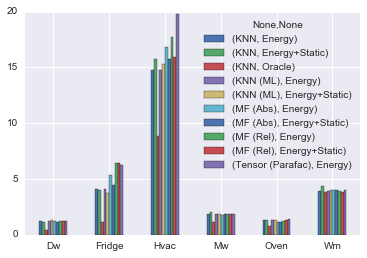

In [24]:
%matplotlib inline
out.T.plot(kind="bar",rot=0)

In [27]:
appliance='hvac'
pred = knn_p[appliance][feature][neighbours]
gt_f, pred_f, rms, e = compute_rmse_fraction(appliance, pred)

In [42]:
print neighbours
pred = mf_p[appliance][feature]['relative'][neighbours]
gt_f, pred_f, rms, e = compute_rmse_fraction(appliance, pred)

4


In [55]:
e[e>50]

hvac_6  2378     66.320
hvac_7  9931     55.425
hvac_8  1283     50.375
        4297     53.084
        5109    111.909
        7016     76.824
        9931     57.367
hvac_9  9931     54.087
dtype: float64

In [30]:
pred.ix[7641]

5     181.223
6     501.261
7     667.553
8     816.993
9     486.119
10    298.398
Name: 7641, dtype: float64

In [32]:
gt_f.ix[7641]

hvac_5     40.110
hvac_6     48.855
hvac_7     52.535
hvac_8     55.951
hvac_9     40.766
hvac_10    29.589
Name: 7641, dtype: float64

In [54]:
pred_f[pred_f>60].unstack().dropna()

hvac_6  2378    66.686
hvac_8  936     70.419
        1169    80.873
        3482    70.894
        4922    63.049
        5109    76.167
        7016    77.230
        9134    67.873
dtype: float64

In [36]:
from mf_core import *

import numpy as np
import pandas as pd
import sys
from create_matrix import *
from sklearn.model_selection import LeaveOneOut
from scipy.optimize import nnls

import pickle
from tensor_custom_core import *


APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
region = "Austin"
year = 2014

def un_normalize(x, maximum, minimum):
    return (maximum-minimum)*x + minimum


a, b = 3, 3

print a, b


pred = {}
for appliance in APPLIANCES[:1]:
    pred[appliance] = {}
    if appliance == "hvac":
        start, stop = 5, 11
    else:
        start, stop = 1, 13
    months = stop - start
    pred[appliance] = {}
    appliance_df = create_matrix_all_entries(region, year, appliance)
    aggregate_cols = [x for x in appliance_df.columns if "aggregate" in x]
    appliance_cols = [x for x in appliance_df.columns if appliance in x]
    energy_cols = np.concatenate([aggregate_cols, appliance_cols])

    df = appliance_df.copy()

3 3


In [42]:
df.columns[-3:]

Index([u'area', u'total_occupants', u'num_rooms'], dtype='object')

In [43]:
static_cols = ['area', 'total_occupants', 'num_rooms']
static_df = df[static_cols]
static_df = static_df.div(static_df.max())

In [44]:
static_df

,area,total_occupants,num_rooms
26,0.585,0.8,0.400
222,0.629,1.0,0.267
410,0.371,0.4,0.533
545,0.699,0.4,0.800
624,0.600,0.8,0.467
661,0.475,0.4,0.400
871,0.472,0.8,0.533
936,0.400,0.8,0.533
1169,0.409,0.4,0.400
1334,0.314,0.4,0.333


In [60]:
weather_df = np.ones(len(static_df)).reshape(-1, 1)

In [61]:
weather_df

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])